# Dependancies

In [535]:
import nltk
from nltk.corpus import treebank
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk import ne_chunk
from textblob import TextBlob
from textblob import Word as wn
from textblob.wordnet import VERB
from textblob.wordnet import Synset
from textblob.np_extractors import ConllExtractor
from textblob.taggers import NLTKTagger


import re
import urllib.request
from bs4 import BeautifulSoup
import requests
import os

# Classes

## NLP Analysis of Text

In [536]:
class NLP_My_Words():
    """Tokenize and analyize text"""
    def __init__(self,text,case='y'):
        
        if (case!='y'):
            self.text=text
        else:
            self.text=text.lower()
        
        raw_word_count=len(self.text.split())
        print(f'Raw text word count: {raw_word_count}\n')
        self.tokenization()
        
    def tokenization(self):
        """Tokenization"""
        self.tokens = nltk.word_tokenize(self.text)
        punctuation=re.compile(r'[-.?!,:;()|=/*"><\{}$&]')

        post_punctuation=[]
        for words in self.tokens:
            word=punctuation.sub('',words)
            if len(word)>0:
                post_punctuation.append(word)

        self.tokens=post_punctuation

        self.nltk_text=nltk.Text(self.tokens)
        
        self.remove_stop_words()


    def sentenance_tokenization(self):
        """Sentenance Tokenization"""
    
        self.sentenance_tokens=sent_tokenize(self.text)

        return self.sentenance_tokens
    
    
    def word_freq(self):
        """Word Frequency"""
    
        freq = nltk.FreqDist(self.tokens)

        for key,val in freq.items():

            print (str(key) + ':' + str(val))

        freq.plot(30, cumulative=False)
        
        self.words_tagged()
        
    def remove_stop_words(self):
        """Stop Words"""
    
        clean_tokens = self.tokens[:]

        sr = stopwords.words('english')

        for token in self.tokens:

            if token in stopwords.words('english'):

                clean_tokens.remove(token)
        self.tokens=clean_tokens
        self.sorted_tokens=sorted(set(self.tokens))
        num_words=len(self.tokens)
        print(f'Tokens: {self.tokens}\n')
        print(f'Tokens (sorted):{self.sorted_tokens}\n')
        print(f'Word count following stop words: {num_words}\n')
        self.word_freq()
    
    
    def words_tagged(self):
        """Word Tagging"""
    
        self.tagged = nltk.pos_tag(self.tokens)
#         tagged[0:6]

        print(f'Word Tags:{self.tagged}\n')
    
        self.Named_Entity_Recognition()
    
    
    def Named_Entity_Recognition(self):
        """Named Entity Recognition"""
        
        self.NER = ne_chunk(self.tagged)
        print(f'Named Entity Recognition:\n{self.NER}')
    
    def lexical_diversity(self):
        """Percentage of word occurance"""
        
        lex_div=len(set(self.tokens))/len(self.tokens)
        print(f'Lexical Diversity:{(lex_div)*100}\n')
        
        

## Scrapping Websites

In [537]:
class Web_Scrapping():
    """Web Scrapping"""
    
    def __init__(self,site):
        self.site=site
        self.web_scrape_html()
      
    def web_scrape_html(self):
        """Retrieve site html"""
    
        import urllib.request

        response = urllib.request.urlopen(self.site)

        self.html = response.read()

    #     print (html)

        self.web_scrape_text()
    
    def web_scrape_text(self):
        """Return text from the site"""
        
        from bs4 import BeautifulSoup

        soup = BeautifulSoup(self.html,"html5lib")

        self.text = soup.get_text(strip=True)
        
#       print(self.text)

        self.analysis_of_site_text()
    
    def analysis_of_site_text(self):
        """Call NLP Analysis class"""
        analysis=NLP_My_Words(self.text)
        
        
    

## Wordnet

In [538]:
class Wordnet_Stuff():
    
    def __init__(self,word):
        self.word=word
        print(f'The word is:{self.word}\n')
        self.definitions()
        self.syn_lem()
        self.synonym()
    def definitions(self):
        """Definition of the word"""
        from nltk.corpus import wordnet

        syn = wordnet.synsets(self.word)
        print(f'Definition:{syn[0].definition()}\n')
        
    def syn_lem(self):
        
        from nltk.corpus import wordnet

        synonyms = []
        for syn in wordnet.synsets(self.word):

            for lemma in syn.lemmas():

                synonyms.append(lemma.name())

        print(f'sny_lem:{synonyms}\n')
        
    def synonym(self):
    
        from nltk.corpus import wordnet

        syn = wordnet.synsets(self.word)

        print(f'syn Definition:{syn[0].definition()}\n')

        print(f'syn Examples:{syn[0].examples()}\n')


## TextBlog

In [539]:
class Sentiment():
    """Conduct sentiment scores"""
    
    def __init__(self,text):
        self.text=text
        self.perform_sentiment()
    
    def call_sentenance_tokens(self):
        """option"""
        pass
    
    def perform_sentiment(self):
        
        TextBlob(self.text).sentiment
        
        pol=lambda x: TextBlob(self.text).sentiment.polarity
        subj=lambda x: TextBlob(self.text).sentiment.subjectivity
        
        the_polarity=pol(self.text)
        
        the_subjectivity=subj(self.text)
        
        y=f'Polority:{the_polarity}\nSubjectivity:{the_subjectivity}'
        
        print(y)
        
        
        
        

# Functions

In [540]:
def url_to_transcript(url):
    """Returns specific text data from a url"""
    page=requests.get(url).text
    soup=BeautifulSoup(page,"html5lib")
    text=[p.text for p in soup.find(class_="shortDescription-col").find_all('p')]
    print(url)
    return text

In [541]:
def read_url_text(url):
    
    from urllib import request
    
    response = request.urlopen(url)
    raw = response.read().decode('utf8')
    
    print(f'Length of the text file:{len(raw)}\n')
    
    return raw[:1000]

In [542]:
def sentence_polarity(the_file):
    
    with open(the_file,"r") as f:
        text=f.read()
#     return text

    blob = TextBlob(text)
    
    x=[]
    raw_sentence_list=blob.raw_sentences
    sentence_list=blob.sentences
    for k,sentence in enumerate (sentence_list):
        pol_score=sentence.sentiment.polarity
        if (pol_score>=0):
            pol='pos'
        else:
            pol="neg"
        
        
        t=(raw_sentence_list[k],pol)
        x.append(t)
        
    return x
            
#         print(type(sentence.sentiment.polarity))
    
    

In [543]:
q='C:/Users/Crystal/Desktop/sidebars/nlp_text_dump.txt'
j=sentence_polarity(q)
j

[('Extensively involved in all phases of engineering R&D testing including management of test operations such as the design of test apparatus, the selection, and calibration, installation of instruments, the processing and analysis of test data.',
  'pos')]

# Main

## Text Data

In [544]:
os.startfile('C:/Users/Crystal/Desktop/sidebars/nlp_text_dump.txt')

In [545]:
base='C:/Users/Crystal/Desktop/sidebars/nlp_text_dump.txt'
other='C:/Users/Crystal/Desktop/sidebars/Dowd Jimmie - 09022019.txt'
f = open(base)
text = f.read()


Raw text word count: 35

Tokens: ['extensively', 'involved', 'phases', 'engineering', 'r', 'testing', 'including', 'management', 'test', 'operations', 'design', 'test', 'apparatus', 'selection', 'calibration', 'installation', 'instruments', 'processing', 'analysis', 'test', 'data']

Tokens (sorted):['analysis', 'apparatus', 'calibration', 'data', 'design', 'engineering', 'extensively', 'including', 'installation', 'instruments', 'involved', 'management', 'operations', 'phases', 'processing', 'r', 'selection', 'test', 'testing']

Word count following stop words: 21

extensively:1
involved:1
phases:1
engineering:1
r:1
testing:1
including:1
management:1
test:3
operations:1
design:1
apparatus:1
selection:1
calibration:1
installation:1
instruments:1
processing:1
analysis:1
data:1


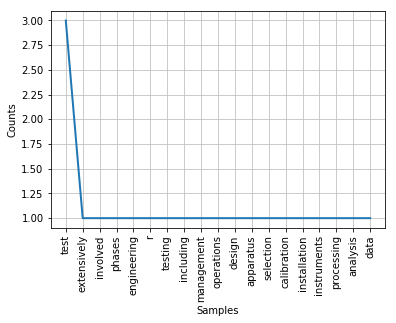

Word Tags:[('extensively', 'RB'), ('involved', 'JJ'), ('phases', 'NNS'), ('engineering', 'NN'), ('r', 'NN'), ('testing', 'VBG'), ('including', 'VBG'), ('management', 'NN'), ('test', 'NN'), ('operations', 'NNS'), ('design', 'VBP'), ('test', 'NN'), ('apparatus', 'NN'), ('selection', 'NN'), ('calibration', 'NN'), ('installation', 'NN'), ('instruments', 'NNS'), ('processing', 'VBG'), ('analysis', 'NN'), ('test', 'NN'), ('data', 'NNS')]

Named Entity Recognition:
(S
  extensively/RB
  involved/JJ
  phases/NNS
  engineering/NN
  r/NN
  testing/VBG
  including/VBG
  management/NN
  test/NN
  operations/NNS
  design/VBP
  test/NN
  apparatus/NN
  selection/NN
  calibration/NN
  installation/NN
  instruments/NNS
  processing/VBG
  analysis/NN
  test/NN
  data/NNS)


In [546]:
w=NLP_My_Words(text,'y')

In [547]:
w.nltk_text

<Text: extensively involved in all phases of engineering r...>

In [548]:
w.nltk_text.collocations()

In [ ]:
w.nltk_text.concordance('park')

In [ ]:
w.nltk_text.similar('poop')

In [ ]:
w.nltk_text.common_contexts(['dog','jim'])

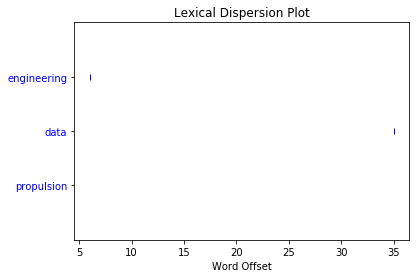

In [549]:
w.nltk_text.dispersion_plot(['engineering','data','propulsion'])

In [ ]:
w.nltk_text.plot()

In [550]:
w.lexical_diversity()

Lexical Diversity:90.47619047619048



## Scrapping

In [ ]:
site='https://www.oreilly.com/online-learning/enterprise.html'

In [ ]:
s=Web_Scrapping(site=site)

## Word Study

In [ ]:
word_study=Wordnet_Stuff('Natural')

## Sentiment Analysis

In [551]:
sent_analy=Sentiment(text)

Polority:0.0
Subjectivity:0.41666666666666663


# Extras

In [552]:
blob = TextBlob(text)
blob.tags      

[('Extensively', 'RB'),
 ('involved', 'VBN'),
 ('in', 'IN'),
 ('all', 'DT'),
 ('phases', 'NNS'),
 ('of', 'IN'),
 ('engineering', 'NN'),
 ('R', 'NNP'),
 ('&', 'CC'),
 ('D', 'NNP'),
 ('testing', 'VBG'),
 ('including', 'VBG'),
 ('management', 'NN'),
 ('of', 'IN'),
 ('test', 'NN'),
 ('operations', 'NNS'),
 ('such', 'JJ'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('design', 'NN'),
 ('of', 'IN'),
 ('test', 'NN'),
 ('apparatus', 'NN'),
 ('the', 'DT'),
 ('selection', 'NN'),
 ('and', 'CC'),
 ('calibration', 'NN'),
 ('installation', 'NN'),
 ('of', 'IN'),
 ('instruments', 'NNS'),
 ('the', 'DT'),
 ('processing', 'NN'),
 ('and', 'CC'),
 ('analysis', 'NN'),
 ('of', 'IN'),
 ('test', 'NN'),
 ('data', 'NNS')]

In [553]:
blob.words

WordList(['Extensively', 'involved', 'in', 'all', 'phases', 'of', 'engineering', 'R', 'D', 'testing', 'including', 'management', 'of', 'test', 'operations', 'such', 'as', 'the', 'design', 'of', 'test', 'apparatus', 'the', 'selection', 'and', 'calibration', 'installation', 'of', 'instruments', 'the', 'processing', 'and', 'analysis', 'of', 'test', 'data'])

In [554]:
blob.noun_phrases

WordList(['extensively', 'test operations', 'test apparatus', 'test data'])

In [555]:
blob.sentences

[Sentence("Extensively involved in all phases of engineering R&D testing including management of test operations such as the design of test apparatus, the selection, and calibration, installation of instruments, the processing and analysis of test data.")]

In [556]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.41666666666666663)


In [557]:
blob.raw_sentences


['Extensively involved in all phases of engineering R&D testing including management of test operations such as the design of test apparatus, the selection, and calibration, installation of instruments, the processing and analysis of test data.']

In [558]:
blob.ngrams(n=3)

[WordList(['Extensively', 'involved', 'in']),
 WordList(['involved', 'in', 'all']),
 WordList(['in', 'all', 'phases']),
 WordList(['all', 'phases', 'of']),
 WordList(['phases', 'of', 'engineering']),
 WordList(['of', 'engineering', 'R']),
 WordList(['engineering', 'R', 'D']),
 WordList(['R', 'D', 'testing']),
 WordList(['D', 'testing', 'including']),
 WordList(['testing', 'including', 'management']),
 WordList(['including', 'management', 'of']),
 WordList(['management', 'of', 'test']),
 WordList(['of', 'test', 'operations']),
 WordList(['test', 'operations', 'such']),
 WordList(['operations', 'such', 'as']),
 WordList(['such', 'as', 'the']),
 WordList(['as', 'the', 'design']),
 WordList(['the', 'design', 'of']),
 WordList(['design', 'of', 'test']),
 WordList(['of', 'test', 'apparatus']),
 WordList(['test', 'apparatus', 'the']),
 WordList(['apparatus', 'the', 'selection']),
 WordList(['the', 'selection', 'and']),
 WordList(['selection', 'and', 'calibration']),
 WordList(['and', 'calibra

In [559]:
blob.parse()

'Extensively/RB/B-VP/O involved/VBN/I-VP/O in/IN/B-PP/B-PNP all/DT/B-NP/I-PNP phases/NNS/I-NP/I-PNP of/IN/B-PP/B-PNP engineering/NN/B-NP/I-PNP R&D/NN/I-NP/I-PNP testing/NN/I-NP/I-PNP including/VBG/B-VP/I-PNP management/NN/B-NP/I-PNP of/IN/B-PP/B-PNP test/NN/B-NP/I-PNP operations/NNS/I-NP/I-PNP such/JJ/B-ADJP/O as/IN/B-PP/B-PNP the/DT/B-NP/I-PNP design/NN/I-NP/I-PNP of/IN/B-PP/B-PNP test/NN/B-NP/I-PNP apparatus/NN/I-NP/I-PNP ,/,/O/O the/DT/B-NP/O selection/NN/I-NP/O ,/,/O/O and/CC/O/O calibration/NN/B-NP/O ,/,/O/O installation/NN/B-NP/O of/IN/B-PP/B-PNP instruments/NNS/B-NP/I-PNP ,/,/O/O the/DT/B-NP/O processing/NN/I-NP/O and/CC/O/O analysis/NN/B-NP/O of/IN/B-PP/B-PNP test/NN/B-NP/I-PNP data/NNS/I-NP/I-PNP ././O/O'

In [560]:
nltk_tagger = NLTKTagger()
blob = TextBlob("Jim walks the dogs in the park.", pos_tagger=nltk_tagger)
blob.pos_tags

[('Jim', 'NNP'),
 ('walks', 'VBZ'),
 ('the', 'DT'),
 ('dogs', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('park', 'NN')]

In [561]:
d = Word("park")
print(f'lemmatize:{d.lemmatize()}\n')
print(d.synsets)


lemmatize:park

[Synset('park.n.01'), Synset('park.n.02'), Synset('ballpark.n.01'), Synset('park.n.04'), Synset('parking_lot.n.01'), Synset('park.n.06'), Synset('park.v.01'), Synset('park.v.02')]


In [562]:
d = Word("walks")

print(f'lemmatize:{d.lemmatize("v")}\n')
print(d.get_synsets(pos=VERB))

lemmatize:walk

[Synset('walk.v.01'), Synset('walk.v.02'), Synset('walk.v.03'), Synset('walk.v.04'), Synset('walk.v.05'), Synset('walk.v.06'), Synset('walk.v.07'), Synset('walk.v.08'), Synset('walk.v.09'), Synset('walk.v.10')]
